# 3. Osciladores acoplados

Resuelva numéricamente el sistema de osciladores de fase acoplados:
\begin{equation}
    \dot{\theta_i} = \omega_i + \frac{k}{N} \sum_{j=1}^N sin(\theta_j − \theta_i),
\end{equation}
para $N \approx 5$ osciladores. Grafique la fase y la frecuencia de todos ellos en función del tiempo, y verifique que, para cada conjunto de frecuencias naturales $\omega_i$, un acoplamiento $k$ suficientemente fuerte produce la sincronización de frecuencias. Verifique, cambiando las frecuencias naturales, que la frecuencia de sincronización es el promedio de las frecuencias naturales.

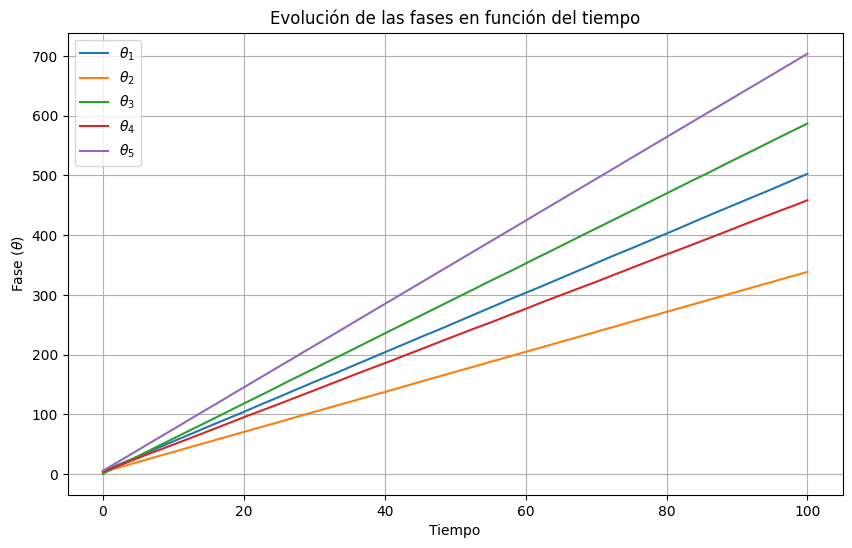

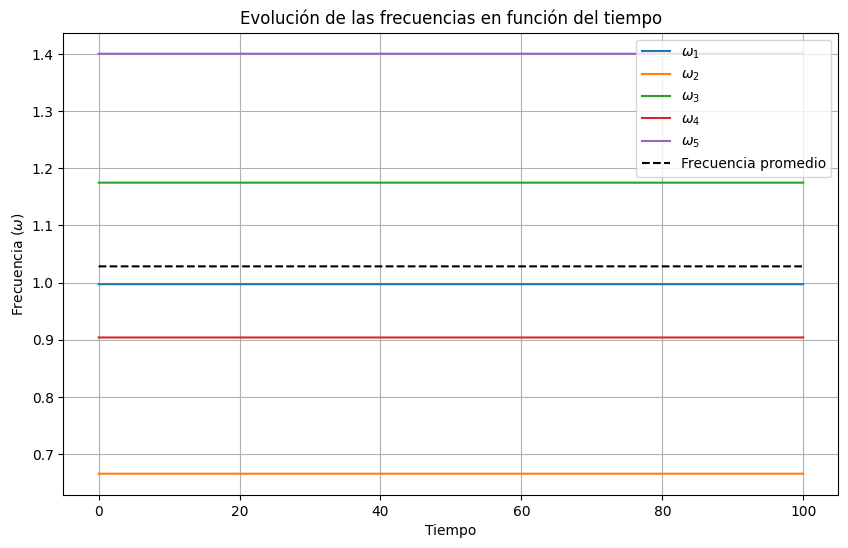

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
N = 5  # Número de osciladores
omega = np.random.uniform(0.5, 1.5, N)  # Frecuencias naturales aleatorias
k = 0.5  # Parámetro de acoplamiento

# Definición de la derivada de theta_i
def dtheta_dt(theta, t):
    dtheta = np.zeros(N)
    for i in range(N):
        for j in range(N):
            dtheta[i] += omega[i] + (k / N) * np.sin(theta[j] - theta[i])
    return dtheta

# Método de Runge-Kutta de cuarto orden para integración numérica
def runge_kutta_step(theta, t, dt):
    k1 = dt * dtheta_dt(theta, t)
    k2 = dt * dtheta_dt(theta + 0.5 * k1, t + 0.5 * dt)
    k3 = dt * dtheta_dt(theta + 0.5 * k2, t + 0.5 * dt)
    k4 = dt * dtheta_dt(theta + k3, t + dt)
    return theta + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Condiciones iniciales
theta_0 = np.random.uniform(0, 2*np.pi, N)

# Parámetros de integración
t_max = 100
dt = 0.01
num_steps = int(t_max / dt)

# Integración numérica
theta_t = np.zeros((num_steps, N))
theta_t[0] = theta_0
for i in range(1, num_steps):
    theta_t[i] = runge_kutta_step(theta_t[i-1], i*dt, dt)

# Graficar las fases en función del tiempo
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(np.arange(num_steps) * dt, theta_t[:, i], label=f'$\\theta_{i+1}$')
plt.xlabel('Tiempo')
plt.ylabel('Fase ($\\theta$)')
plt.title('Evolución de las fases en función del tiempo')
plt.legend()
plt.grid(True)
plt.show()

# Calcular las frecuencias promedio
omega_promedio = np.mean(omega)

# Graficar las frecuencias en función del tiempo
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(np.arange(num_steps) * dt, omega[i] * np.ones(num_steps), label=f'$\\omega_{i+1}$')
plt.plot(np.arange(num_steps) * dt, omega_promedio * np.ones(num_steps), 'k--', label='Frecuencia promedio')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia ($\\omega$)')
plt.title('Evolución de las frecuencias en función del tiempo')
plt.legend()
plt.grid(True)
plt.show()
